[View in Colaboratory](https://colab.research.google.com/github/ZER-0-NE/ML_problems/blob/master/Fine_tune_inception_resnet_v2.ipynb)

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6751157919643282574, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11287966516
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16574248453518870281
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
from google.colab import auth
from googleapiclient.discovery import build
import io , requests, os
import sys
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [9]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .../0

Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17)

In [0]:
from google.colab import auth
auth.authenticate_user()

In [17]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 6.9MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /content/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [20]:
fileId = drive.CreateFile({'id': '1OhPBMbSOG3ejP26-peRmDPYX7WfF2ixN'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('dataset_cfps.zip')  # Save Drive file as a local file

dataset_cfps.zip


In [21]:
!unzip dataset_cfps.zip -d ./

Archive:  dataset_cfps.zip
   creating: ./dataset_cfps/
   creating: ./dataset_cfps/train/
   creating: ./dataset_cfps/train/22q11/
  inflating: ./dataset_cfps/train/22q11/22q11_0_1029.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1046.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1186.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1303.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1433.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1464.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1521.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1538.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1563.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1852.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1906.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1987.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_2158.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_2174.jpg  
  inflating: ./dataset_cfps/train/22q11/22


  inflating: ./dataset_cfps/train/Down/Down (21).jpg  
  inflating: ./dataset_cfps/train/Down/Down (22).jpg  
  inflating: ./dataset_cfps/train/Down/Down (23).jpg  
  inflating: ./dataset_cfps/train/Down/Down (24).jpg  
  inflating: ./dataset_cfps/train/Down/down (3).jpg  
  inflating: ./dataset_cfps/train/Down/down (4).jpg  
  inflating: ./dataset_cfps/train/Down/Down (5).jpg  
  inflating: ./dataset_cfps/train/Down/Down (6).jpg  
  inflating: ./dataset_cfps/train/Down/Down (7).jpg  
  inflating: ./dataset_cfps/train/Down/Down (8).jpg  
  inflating: ./dataset_cfps/train/Down/Down (9).jpg  
  inflating: ./dataset_cfps/train/Down/Down.jpg  
  inflating: ./dataset_cfps/train/Down/Down1001.jpg  
  inflating: ./dataset_cfps/train/Down/Down1003.jpg  
  inflating: ./dataset_cfps/train/Down/Down1006.jpg  
  inflating: ./dataset_cfps/train/Down/Down1009.jpg  
  inflating: ./dataset_cfps/train/Down/Down1012.jpg  
  inflating: ./dataset_cfps/train/Down/Down1015.jpg  
  inflating: ./dataset_cfps


  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_5067.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_5068.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_5143.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_5169.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_5184.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_5243.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_5307.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_5343.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_5373.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_544.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_5527.jpg  
  inflating: ./dataset_cfps/train/Treacher Collins/Treacher Collins_0_5553.jpg  
  inflating: ./dataset_cfps/


   creating: ./dataset_cfps/validation/Progeria/
  inflating: ./dataset_cfps/validation/Progeria/Progeria241.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria244.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria274.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria275.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria276.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria277.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria278.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria279.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria280.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria281.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria282.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria283.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria284.jpg  
  inflating: ./dataset_cfps/validation/Progeria/Progeria285.jpg  
  inflating: ./dataset_cfp

In [22]:
!ls


datalab  dataset_cfps  dataset_cfps.zip


In [23]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
from keras.models import load_model
import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [32]:
train_data_path = 'dataset_cfps/train'
validation_data_path = 'dataset_cfps/validation'

#Parametres
img_width, img_height = 150, 150

# Loading inceptionResnetv2
incep_res_v2 = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))
# Freezing the last 4 layeers
for layer in incep_res_v2 .layers[1:]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in incep_res_v2 .layers:
    print(layer, layer.trainable)

# Create the model
model = models.Sequential()
 
# Add the convolutional base model
model.add(incep_res_v2)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation='sigmoid'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()
model = load_model('incep_res_v2_new2.h5')
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

<keras.engine.topology.InputLayer object at 0x7fbaea45d048> False
<keras.layers.convolutional.Conv2D object at 0x7fbaec4304a8> False
<keras.layers.normalization.BatchNormalization object at 0x7fbaea45d208> False
<keras.layers.core.Activation object at 0x7fbac2834cf8> False
<keras.layers.convolutional.Conv2D object at 0x7fbac2871cf8> False
<keras.layers.normalization.BatchNormalization object at 0x7fbaa17f8b70> False
<keras.layers.core.Activation object at 0x7fbac91f07b8> False
<keras.layers.convolutional.Conv2D object at 0x7fbac9192390> False
<keras.layers.normalization.BatchNormalization object at 0x7fbac91a38d0> False
<keras.layers.core.Activation object at 0x7fbac9139400> False
<keras.layers.pooling.MaxPooling2D object at 0x7fbac90f67f0> False
<keras.layers.convolutional.Conv2D object at 0x7fbac90dbf60> False
<keras.layers.normalization.BatchNormalization object at 0x7fbac90ab0b8> False
<keras.layers.core.Activation object at 0x7fbac9015208> False
<keras.layers.convolutional.Conv2D 

 False
<keras.layers.convolutional.Conv2D object at 0x7fba09a02588> False
<keras.layers.core.Lambda object at 0x7fba09998400> False
<keras.layers.core.Activation object at 0x7fba09966e80> False
<keras.layers.convolutional.Conv2D object at 0x7fba098c0828> False
<keras.layers.normalization.BatchNormalization object at 0x7fba0989a4a8> False
<keras.layers.core.Activation object at 0x7fba0987b128> False
<keras.layers.convolutional.Conv2D object at 0x7fba09839dd8> False
<keras.layers.normalization.BatchNormalization object at 0x7fba097e9e10> False
<keras.layers.core.Activation object at 0x7fba096dbda0> False
<keras.layers.convolutional.Conv2D object at 0x7fba09945518> False
<keras.layers.convolutional.Conv2D object at 0x7fba09756a20> False
<keras.layers.normalization.BatchNormalization object at 0x7fba09903ef0> False
<keras.layers.normalization.BatchNormalization object at 0x7fba09740080> False
<keras.layers.core.Activation object at 0x7fba0989af98> False
<keras.layers.core.Activation object

Found 1774 images belonging to 12 classes.
Found 313 images belonging to 12 classes.
Epoch 1/50
4/3 [==================================] - 70s 17s/step - loss: 1.2861 - acc: 0.6390 - val_loss: 7.2090 - val_acc: 0.2173
Epoch 2/50
4/3 [==================================] - 15s 4s/step - loss: 0.8657 - acc: 0.7347 - val_loss: 7.2938 - val_acc: 0.2620
Epoch 3/50
4/3 [==================================] - 18s 5s/step - loss: 0.8723 - acc: 0.7312 - val_loss: 7.6496 - val_acc: 0.2204
Epoch 4/50
4/3 [==================================] - 17s 4s/step - loss: 0.7909 - acc: 0.7501 - val_loss: 7.9039 - val_acc: 0.2364
Epoch 5/50
4/3 [==================================] - 19s 5s/step - loss: 0.8294 - acc: 0.7360 - val_loss: 7.6462 - val_acc: 0.2620
Epoch 6/50
4/3 [==================================] - 17s 4s/step - loss: 0.7583 - acc: 0.7591 - val_loss: 6.9371 - val_acc: 0.2524
Epoch 7/50
4/3 [==================================] - 19s 5s/step - loss: 0.7093 - acc: 0.7638 - val_loss: 7.2927 - val_ac

4/3 [==================================] - 19s 5s/step - loss: 0.8146 - acc: 0.7472 - val_loss: 8.1747 - val_acc: 0.2204
Epoch 18/50
4/3 [==================================] - 18s 5s/step - loss: 0.7603 - acc: 0.7533 - val_loss: 7.5063 - val_acc: 0.2684
Epoch 19/50
4/3 [==================================] - 18s 5s/step - loss: 0.7533 - acc: 0.7640 - val_loss: 7.2712 - val_acc: 0.2620
Epoch 20/50
4/3 [==================================] - 18s 5s/step - loss: 0.7381 - acc: 0.7625 - val_loss: 7.2429 - val_acc: 0.2652
Epoch 21/50
4/3 [==================================] - 18s 5s/step - loss: 0.7083 - acc: 0.7749 - val_loss: 7.9171 - val_acc: 0.2428
Epoch 22/50
4/3 [==================================] - 18s 4s/step - loss: 0.7007 - acc: 0.7809 - val_loss: 6.9089 - val_acc: 0.2684
Epoch 23/50
4/3 [==================================] - 19s 5s/step - loss: 0.7426 - acc: 0.7672 - val_loss: 8.0018 - val_acc: 0.2620
Epoch 24/50
4/3 [==================================] - 18s 5s/step - loss: 0.7367

4/3 [==================================] - 17s 4s/step - loss: 0.6492 - acc: 0.7799 - val_loss: 8.3028 - val_acc: 0.2332
Epoch 35/50
4/3 [==================================] - 19s 5s/step - loss: 0.7674 - acc: 0.7556 - val_loss: 7.1914 - val_acc: 0.2652
Epoch 36/50
4/3 [==================================] - 18s 5s/step - loss: 0.6988 - acc: 0.7803 - val_loss: 6.3041 - val_acc: 0.2875
Epoch 37/50
4/3 [==================================] - 18s 5s/step - loss: 0.6452 - acc: 0.7850 - val_loss: 7.1154 - val_acc: 0.2812
Epoch 38/50
4/3 [==================================] - 18s 5s/step - loss: 0.6271 - acc: 0.7939 - val_loss: 7.9468 - val_acc: 0.2524
Epoch 39/50
4/3 [==================================] - 18s 5s/step - loss: 0.6943 - acc: 0.7793 - val_loss: 7.1120 - val_acc: 0.2620
Epoch 40/50
4/3 [==================================] - 17s 4s/step - loss: 0.5991 - acc: 0.8234 - val_loss: 6.9533 - val_acc: 0.2907
Epoch 41/50
4/3 [==================================] - 18s 5s/step - loss: 0.6503

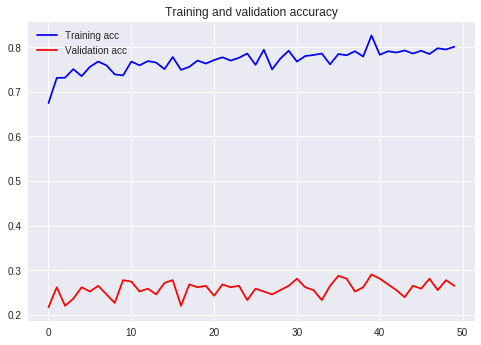

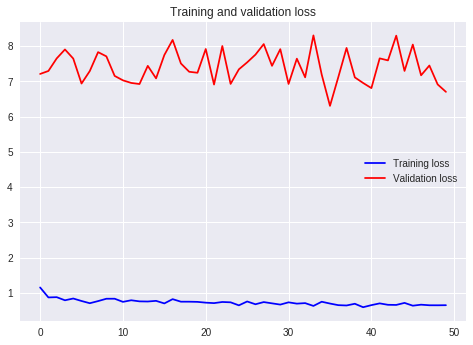

In [33]:
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 512
val_batchsize = 512
 
train_generator = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(img_width, img_height),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_path,
        target_size=(img_width, img_height),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4,clipvalue=0.5),
              metrics=['acc'])

#class_weights = {0: 4, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 4, 7: 2, 8: 4, 9: 2, 10: 6, 11: 1}
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('incep_res_v2_new3.h5')

# loss and accuracy curves.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()


In [34]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()


  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /content/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - done
  Stored in directory: /content/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 4.8 GB  I Proc size: 8.3 GB
GPU RAM Free: 503MB | Used: 10936MB | Util  96% | Total 11439MB
